In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
housing = fetch_california_housing()

In [26]:
X_train_full, X_test, y_train_full,y_test=train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full)
print(X_train.shape)

(11610, 8)


In [37]:
scaler = StandardScaler()#データの標準化
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
print(X_train.shape)

(11610, 8)


In [38]:
model=keras.models.Sequential([keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
                              keras.layers.Dense(1)])
model.compile(loss="mean_squared_error",optimizer="sgd")

In [39]:
history=model.fit(X_train, y_train, epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.8134 - val_loss: 1.7696
Epoch 2/20
11610/11610 [==============================] - 1s 83us/sample - loss: 0.8886 - val_loss: 7.4400
Epoch 3/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5305 - val_loss: 0.4296
Epoch 4/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4299 - val_loss: 0.4006
Epoch 5/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4137 - val_loss: 0.3868
Epoch 6/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4030 - val_loss: 0.3829
Epoch 7/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.3956 - val_loss: 0.3692
Epoch 8/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3886 - val_loss: 0.3789
Epoch 9/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3839 - val_

In [40]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

In [41]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [42]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=0.001))

In [43]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [44]:
history=model.fit((X_train_A,X_train_B),y_train,epochs=20,
                  validation_data=((X_valid_A,X_valid_B),y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 124us/sample - loss: 1.7814 - val_loss: 1.7410
Epoch 2/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.8125 - val_loss: 0.7545
Epoch 3/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.6967 - val_loss: 0.6872
Epoch 4/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.6546 - val_loss: 0.6492
Epoch 5/20
11610/11610 [==============================] - 1s 79us/sample - loss: 0.6246 - val_loss: 0.6361
Epoch 6/20
11610/11610 [==============================] - 1s 84us/sample - loss: 0.6012 - val_loss: 0.6102
Epoch 7/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.5809 - val_loss: 0.5976
Epoch 8/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.5634 - val_loss: 0.5731
Epoch 9/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5469 - va

In [45]:
mse_test=model.evaluate((X_test_A,X_test_B),y_test)

5160/5160 [==============================] - 0s 66us/sample - loss: 0.4815


In [46]:
y_pred=model.predict((X_new_A,X_new_B))

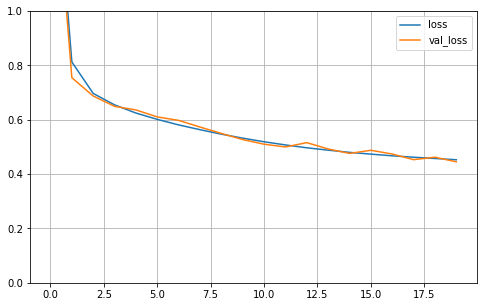

In [47]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
#plt.ylim(0,1)
plt.show()

In [51]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
#出力を二つに分けてるよ
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="sgd")
hisotry=model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 134us/sample - loss: 0.7946 - main_output_loss: 0.6943 - aux_output_loss: 1.6963 - val_loss: 1.5479 - val_main_output_loss: 1.5093 - val_aux_output_loss: 1.8888
Epoch 2/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4970 - main_output_loss: 0.4525 - aux_output_loss: 0.8978 - val_loss: 0.7113 - val_main_output_loss: 0.6772 - val_aux_output_loss: 1.0164
Epoch 3/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4616 - main_output_loss: 0.4295 - aux_output_loss: 0.7514 - val_loss: 0.9529 - val_main_output_loss: 0.9463 - val_aux_output_loss: 1.0092
Epoch 4/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4552 - main_output_loss: 0.4300 - aux_output_loss: 0.6825 - val_loss: 0.4628 - val_main_output_loss: 0.4308 - val_aux_output_loss: 0.7502
Epoch 5/20
11610/11610 [==============================] - 1s 73us/